In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pickle
import umap
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

/Users/thesofakillers/miniconda3/envs/thesis/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/thesofakillers/miniconda3/envs/thesis/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/thesofakillers/miniconda3/envs/thesis/lib/pyt

In [3]:
sns.set_style("ticks")
sns.set_context("paper")

In [4]:
def load_data(save_dir):
    textual_trajs = np.load(os.path.join(save_dir, "textual_trajs.npy"))
    visual_trajs = np.load(os.path.join(save_dir, "visual_trajs.npy"))
    task_ids = np.load(os.path.join(save_dir, "task_ids.npy"))
    seeds = np.load(os.path.join(save_dir, "seeds.npy"))

    with open(os.path.join(save_dir, "goal_objs.pkl"), "rb") as f:
        goal_objs = pickle.load(f)
    with open(os.path.join(save_dir, "distractors.pkl"), "rb") as f:
        distractors = pickle.load(f)

    return textual_trajs, visual_trajs, task_ids, seeds, goal_objs, distractors


def get_umap_embs(visual_trajs, textual_trajs, fit_target="visual"):
    reducer = umap.UMAP()
    if fit_target == "visual":
        reducer.fit(visual_trajs)
    else:
        reducer.fit(textual_trajs)

    visual_embs = reducer.transform(visual_trajs)
    textual_embs = reducer.transform(textual_trajs)

    return textual_embs, visual_embs

In [5]:
clipt_save_dir = "../outputs/babyai/clipt-embs/"
cclipt_save_dir = "../outputs/babyai/cclipt-embs/"

In [6]:
clipt_data = load_data(clipt_save_dir)
cclipt_data = load_data(cclipt_save_dir)

pygame 2.5.0 (SDL 2.28.0, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
clipt_textual_trajs, clipt_visual_trajs, clipt_task_ids, _, clipt_goals = clipt_data[:5]
(
    cclipt_textual_trajs,
    cclipt_visual_trajs,
    cclipt_task_ids,
    _,
    cclipt_goals,
) = cclipt_data[:5]

In [25]:
clipt_goal_colors = np.array([goal.color for goal in clipt_goals])
cclipt_goal_colors = np.array([goal.color for goal in cclipt_goals])

clipt_goal_types = np.array([goal.type for goal in clipt_goals])
cclipt_goal_types = np.array([goal.type for goal in cclipt_goals])

In [26]:
type_to_color = {"key": "gold", "box": "black", "ball": "purple"}

In [27]:
clipt_goal_types_colors = np.vectorize(type_to_color.get)(clipt_goal_types)
cclipt_goal_types_colors = np.vectorize(type_to_color.get)(cclipt_goal_types)

In [8]:
# takes a while :) (~3 mins)
clipt_textual_embs, clipt_visual_embs = get_umap_embs(
    clipt_visual_trajs, clipt_textual_trajs
)

cclipt_textual_embs, cclipt_visual_embs = get_umap_embs(
    cclipt_visual_trajs, cclipt_textual_trajs
)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
(clipt_textual_embs == clipt_visual_embs).all()

False

In [10]:
cclipt_visual_embs.shape

(6000, 2)

In [11]:
id_to_env = [
    # go to the key
    "Custom-GoToObjK-v0",
    # go to the box
    "Custom-GoToObjBx-v0",
    # go to the ball
    "Custom-GoToObjBl-v0",
    # go to the red object
    "Custom-GoToColorR-v0",
    # go to the green object
    "Custom-GoToColorG-v0",
    # go to the blue object
    "Custom-GoToColorB-v0",
]
env_to_id = {task: i for i, task in enumerate(id_to_env)}
env_to_task = {
    "Custom-GoToObjK-v0": "Go to the key",
    "Custom-GoToObjBx-v0": "Go to the box",
    "Custom-GoToObjBl-v0": "Go to the ball",
    "Custom-GoToColorR-v0": "Go to the red object",
    "Custom-GoToColorG-v0": "Go to the green object",
    "Custom-GoToColorB-v0": "Go to the blue object",
}
id_to_task = [env_to_task[env] for env in id_to_env]
env_to_color = {
    "Custom-GoToObjK-v0": "gold",
    "Custom-GoToObjBx-v0": "black",
    "Custom-GoToObjBl-v0": "purple",
    "Custom-GoToColorR-v0": "red",
    "Custom-GoToColorG-v0": "green",
    "Custom-GoToColorB-v0": "blue",
}
id_to_color = [env_to_color[env] for env in id_to_env]
id_to_color_map = {i: color for i, color in enumerate(id_to_color)}

In [12]:
# task_ids is the same for both clipt and cclipt
task_id_colors = np.vectorize(id_to_color_map.get)(clipt_task_ids)

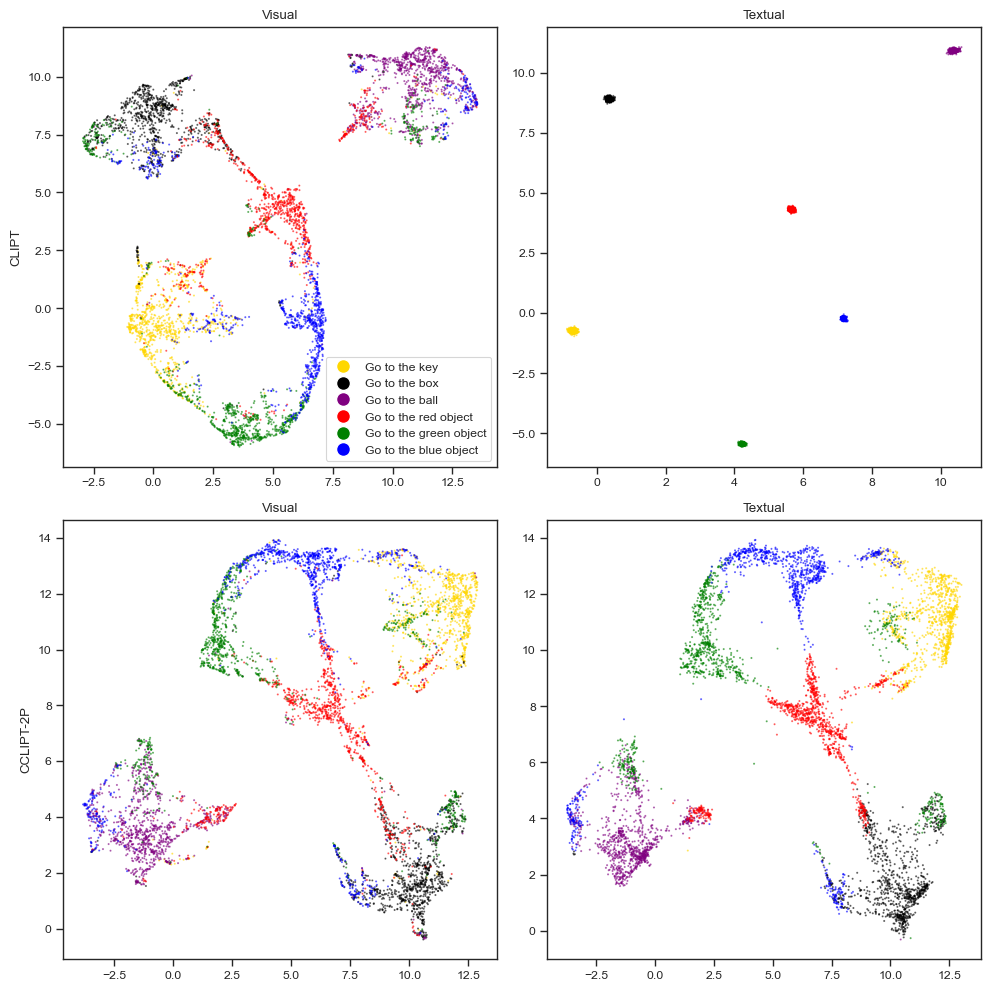

In [13]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

scatter_kwargs = {"s": 0.5, "color": task_id_colors, "alpha": 0.5}

ax1.scatter(clipt_visual_embs[:, 0], clipt_visual_embs[:, 1], **scatter_kwargs)
ax1.set_title("Visual")
ax1.set_ylabel("CLIPT")
ax2.scatter(clipt_textual_embs[:, 0], clipt_textual_embs[:, 1], **scatter_kwargs)
ax2.set_title("Textual")

ax3.scatter(cclipt_visual_embs[:, 0], cclipt_visual_embs[:, 1], **scatter_kwargs)
ax3.set_title("Visual")
ax3.set_ylabel("CCLIPT-2P")
ax4.scatter(cclipt_textual_embs[:, 0], cclipt_textual_embs[:, 1], **scatter_kwargs)
ax4.set_title("Textual")


legend_elements = []
for task_id in range(len(id_to_env)):
    label = id_to_task[task_id]
    legend_elements.append(
        plt.Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            markerfacecolor=id_to_color[task_id],
            markersize=10,
            label=label,
        )
    )

ax1.legend(handles=legend_elements)

f.set_tight_layout(True)
plt.show()

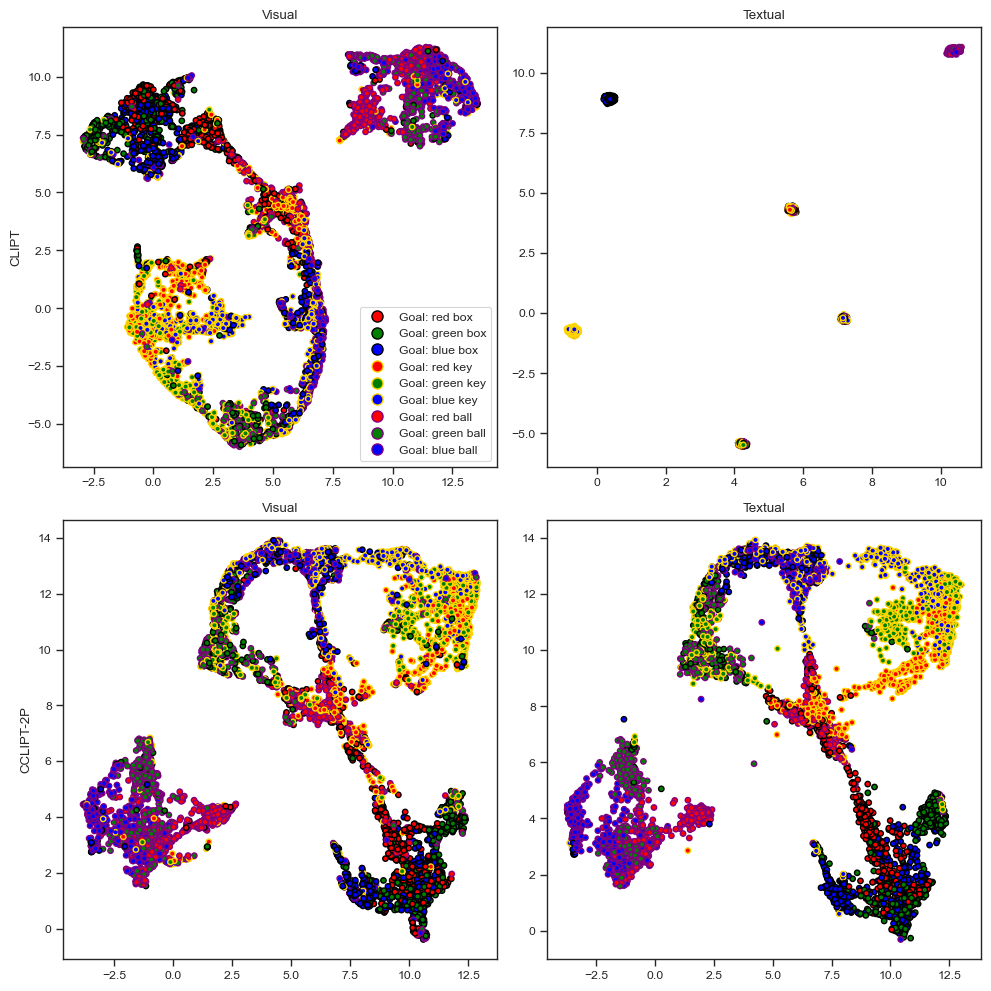

In [46]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

clipt_scatter_kwargs = {
    "s": 15,
    "color": clipt_goal_colors,
    "edgecolors": clipt_goal_types_colors,
    # "alpha": 0.5,
    "linewidths": 1,
}

ax1.scatter(clipt_visual_embs[:, 0], clipt_visual_embs[:, 1], **clipt_scatter_kwargs)
ax1.set_title("Visual")
ax1.set_ylabel("CLIPT")
ax2.scatter(clipt_textual_embs[:, 0], clipt_textual_embs[:, 1], **clipt_scatter_kwargs)
ax2.set_title("Textual")

cclipt_scatter_kwargs = {
    "s": 15,
    "color": cclipt_goal_colors,
    "edgecolors": cclipt_goal_types_colors,
    # "alpha": 0.5,
    "linewidths": 1,
}
ax3.scatter(cclipt_visual_embs[:, 0], cclipt_visual_embs[:, 1], **cclipt_scatter_kwargs)
ax3.set_title("Visual")
ax3.set_ylabel("CCLIPT-2P")
ax4.scatter(
    cclipt_textual_embs[:, 0], cclipt_textual_embs[:, 1], **cclipt_scatter_kwargs
)
ax4.set_title("Textual")


legend_elements = []
for gtype in {"key", "box", "ball"}:
    for gcolor in {"red", "green", "blue"}:
        label = f"Goal: {gcolor} {gtype}"

        legend_elements.append(
            plt.Line2D(
                [0],
                [0],
                marker="o",
                color="w",
                markerfacecolor=gcolor,
                markeredgecolor=type_to_color[gtype],
                markersize=8,
                label=label,
            )
        )

ax1.legend(handles=legend_elements)

f.set_tight_layout(True)
plt.show()